In [1]:
import keras
from keras.layers import Dense,LSTM,Embedding,Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import numpy as np

Using TensorFlow backend.


In [2]:
with open("lyrics.txt",'r') as file:
    data =[]
    lines = file.readlines()
    tokenizer  = Tokenizer()
    for i in range(len(lines)):
        line = lines[i]
        line = line.lower()
        data.append(line)
        
    tokenizer.fit_on_texts(data)
word_index = tokenizer.word_index

In [3]:
input_sequences = []
labels = []
for line in data:
    sequence = tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(sequence)):
        token_list = sequence[:i]
        label = sequence[i]
        labels.append(label)
        input_sequences.append(token_list)
    

In [4]:
input_sequences = pad_sequences(input_sequences)

In [5]:
max_length = len(input_sequences[0])
print(max_length)
total_words = len(word_index)+1  #because word_index starts from 1
print(total_words)

15
2690


In [6]:
model  = keras.Sequential([Embedding(total_words,100,input_length = max_length),
                          Bidirectional(LSTM(64)),
                           Dense(total_words,activation = "softmax")
                          ])
from keras.callbacks import ModelCheckpoint
checkpoint_cb = ModelCheckpoint('model.h5',save_best_only=True, monitor = 'train_loss')

In [7]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["acc"])
history = model.fit(input_sequences, labels, epochs=125,callbacks = [checkpoint_cb])

C:\Users\Dev\Miniconda3\envs\tfgpu\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/125
12038/12038 [==============================] - 8s 703us/step - loss: 6.7797 - acc: 0.0649
Epoch 2/125
  192/12038 [..............................] - ETA: 9s - loss: 6.4087 - acc: 0.0469

C:\Users\Dev\Miniconda3\envs\tfgpu\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with train_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


12038/12038 [==============================] - 8s 667us/step - loss: 6.2815 - acc: 0.0709
Epoch 3/125
12038/12038 [==============================] - 8s 660us/step - loss: 6.0880 - acc: 0.0807
Epoch 4/125
12038/12038 [==============================] - 8s 665us/step - loss: 5.8979 - acc: 0.0925
Epoch 5/125
12038/12038 [==============================] - 9s 732us/step - loss: 5.6997 - acc: 0.1022
Epoch 6/125
12038/12038 [==============================] - 8s 700us/step - loss: 5.5072 - acc: 0.1111
Epoch 7/125
12038/12038 [==============================] - 8s 688us/step - loss: 5.3262 - acc: 0.1214 0s - loss: 5.3274 - acc: 0.12
Epoch 8/125
12038/12038 [==============================] - 10s 801us/step - loss: 5.1522 - acc: 0.1306
Epoch 9/125
12038/12038 [==============================] - 9s 758us/step - loss: 4.9797 - acc: 0.1401
Epoch 10/125
12038/12038 [==============================] - 8s 700us/step - loss: 4.8096 - acc: 0.1504
Epoch 11/125
12038/12038 [==============================] - 8s

12038/12038 [==============================] - 7s 605us/step - loss: 0.5805 - acc: 0.8477
Epoch 81/125
12038/12038 [==============================] - 9s 709us/step - loss: 0.5765 - acc: 0.8480
Epoch 82/125
12038/12038 [==============================] - 8s 683us/step - loss: 0.5766 - acc: 0.8469
Epoch 83/125
12038/12038 [==============================] - 8s 671us/step - loss: 0.5751 - acc: 0.8476
Epoch 84/125
12038/12038 [==============================] - 8s 671us/step - loss: 0.5713 - acc: 0.8477
Epoch 85/125
12038/12038 [==============================] - 8s 668us/step - loss: 0.5583 - acc: 0.8502
Epoch 86/125
12038/12038 [==============================] - 8s 667us/step - loss: 0.5516 - acc: 0.8511
Epoch 87/125
12038/12038 [==============================] - 8s 670us/step - loss: 0.5486 - acc: 0.8497
Epoch 88/125
12038/12038 [==============================] - 8s 669us/step - loss: 0.5515 - acc: 0.8506
Epoch 89/125
12038/12038 [==============================] - 8s 682us/step - loss: 0.54

In [8]:
index_word = tokenizer.index_word
sentence = "Help me Obi Wan Kenobi you are my only hope"
for i in range(100):
    sequence = tokenizer.texts_to_sequences([sentence])[0]
    sequence = pad_sequences([sequence],maxlen=max_length)
    predictions = model.predict([sequence])
    prediction = np.argmax(predictions)
    word  = index_word.get(prediction)
    sentence+=" "+word
    
print(sentence)

Help me Obi Wan Kenobi you are my only hope were red as gentle as my sun mythology mythology smoke wander fleet springtime wings same tore linnet grand smoke smoke killarneys makes returned magic everywhere told makes constant toomebridge please rove handsome salley venture wander wander laity smoke wings smoke sword open dance smiled name answer handsome moaning laity wonders moaning sudden trades wedding naught stony makes magic havent harm constant harm returned whats doesnt credit she whispers rose away away from me and they were only time brave on a water both boo round springtime everywhere harm constant fray caused wind useless wind fol lay mounted nelly scruff clergy


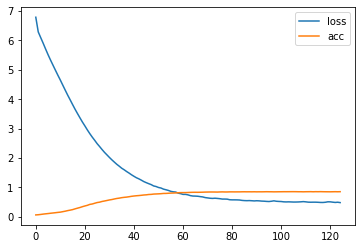

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot()

In [11]:
# model.save('model.h5')